In [1]:
import numpy as np
import lbg_forecast.nz as nz
import matplotlib.pyplot as plt
import scipy as sc

In [2]:
nruns=64

In [3]:
run='pop_no_dust'
nzs = []
for i in range(nruns):
    nzs.append(np.load("nz_samples/nz_"+run+"_"+str(i)+".npy", allow_pickle=True))

nzs = np.array(nzs)
nzs = np.vstack(nzs)
print(nzs.shape)

(256, 3)


In [4]:
run='pop_no_dust_mean'
nzs_mean = []
for i in range(nruns):
    nzs_mean.append(np.load("nz_samples/nz_"+run+"_"+str(i)+".npy", allow_pickle=True))

nzs_mean = np.array(nzs_mean)
nzs_mean = np.vstack(nzs_mean)
print(nzs_mean.shape)

(256, 3)


In [5]:
def plot_nzs(axes, nzs, mean, density, a, p, **kwargs):

    ndropouts = 3

    percentile=p

    bin_step = 0.05
    bin_start = 0
    bin_end = 7

    bins = np.arange(bin_start, bin_end, bin_step)
    colours = ['blue', 'red', 'green']
    labels = ['u-dropouts', "g-dropouts", "r-dropouts"]


    samples=15
    grid = np.arange(bin_start, bin_end-bin_step, bin_step/samples)

    for drop in range(ndropouts):

        values = []
        for ind in range(nzs.shape[0]):
            hist = np.histogram(nzs[ind][drop], density=density, bins=bins)
            oversampled_values = np.repeat(hist[0], samples)
            values.append(oversampled_values)

        values = np.vstack((np.array(values)))
        mean_at_grid_point = np.mean(values, axis=0)
        percentile_at_point = np.percentile(values, [100-percentile, 50, percentile], axis=0)
        if(mean):
            axes.plot(grid, mean_at_grid_point, c=colours[drop], **kwargs, label=labels[drop])
        axes.fill_between(grid, percentile_at_point[0, :], percentile_at_point[2, :], alpha=a, color=colours[drop], lw=0)

    plt.legend(fontsize=24)
    plt.xlabel("redshift z", fontsize=24)
    plt.ylabel("Samples", fontsize=24)
    plt.tick_params('x', labelsize=24)
    plt.tick_params('y', labelsize=24)
    #plt.ylim(0, 2.5)

In [6]:
#nzs_mean = np.load("nz_samples/nz_hpc50mean.npy", allow_pickle=True)
#nzs = np.load("nz_samples/nz_hpc50.npy", allow_pickle=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


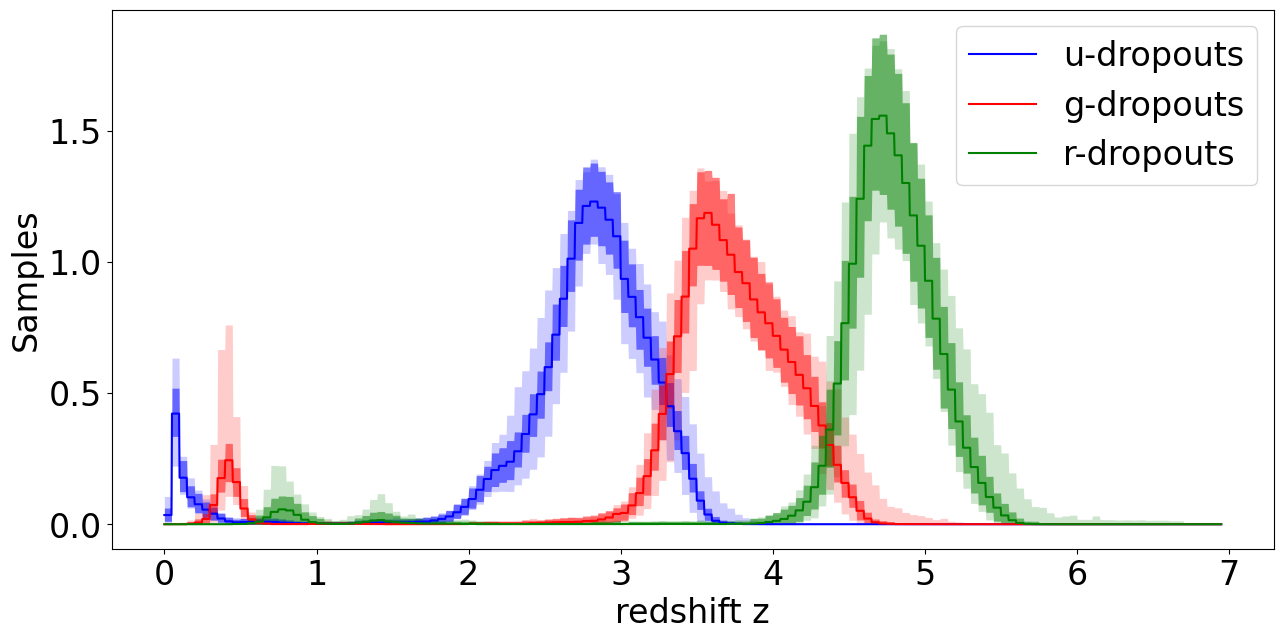

In [15]:
p=98
fig1, axes = plt.subplots(1, 1, figsize=(15,7), sharex=False, sharey=False)
plot_nzs(axes, nzs, mean=False, density=True, ls='--', a=0.2, p=p)
#plot_nzs(axes, nzs, mean=True, density=True, ls='-', a=0.5, p=85)
plot_nzs(axes, nzs_mean, mean=True, density=True, ls='-', a=0.5, p=p)

In [8]:
print(nzs[0][0].shape, nzs_mean[0][0].shape)
print(nzs[0][1].shape, nzs_mean[0][1].shape)
print(nzs[0][2].shape, nzs_mean[0][2].shape)

(4630,) (5204,)
(3181,) (3867,)
(1123,) (1771,)
